# [CoE202] note 07c. Neural Network (Numpy, 0 hidden layer)

- Class Date : 21.04.29.
- Office Hour : -----------
- If you have any questions, ask via KLMS Q&A board or come to TA office hour to get our help.

In [1]:
# this is just an annotation
import numpy as np # this is for importing numpy library (and we will use abbreviation np for that)
import matplotlib.pyplot as plt # this is for importing matplotlib.pyplot (library for graph plot)
import scipy.io

In [2]:
# load data file from Google drive
from google.colab import drive
drive.mount("/content/drive")
mat = scipy.io.loadmat('/content/drive/My Drive/01_LectureNotes/CoE202/Colab/data/data_nonlinear_classification.mat')

data = mat['data']
label = mat['label']

Mounted at /content/drive


In [3]:
# define our nonlinear classifier
class nonlinear_classifier():

    # set initial weights
    def __init__(self, W1_init):
        super(nonlinear_classifier, self).__init__()
        self.W1 = W1_init

            
    # forward pass
    def forward(self, x):

        # xk : input, zk: Wxk+b, yk = h(zk) (h is the activation function) @ kth layer
        self.x1 = x  # input of the 1st layer = input of the network
        self.y1, self.z1 = self.forward_single_layer(self.W1, self.x1) 
        y = self.y1 # output of the network = output of the 2nd layer

        return y # return network output

    def backward(self, label):

        y = self.y1
        
        # calculate loss and accuracy 
        loss = cross_entropy(y, label)
        loss_avg = np.mean(loss)        
        prediction_threshold = (y>0.5)
        accuracy = np.mean(prediction_threshold==label)
        n_sample = label.shape[1]

        # back-propagate
        dLdy = (y-label)/(y*(1-y))

        dLdy, dLdw1 = self.backward_single_layer(self.W1, self.x1, self.y1, dLdy)

        return loss_avg, accuracy, dLdw1

    def forward_single_layer(self, W, x):

        # x : input, z: Wx+b, y = h(z) (h is the activation function)
     
        x_pad = np.concatenate( (x, np.ones((1, x.shape[1]))), axis=0) # x_pad = [x; 1]
        z = np.matmul(W,x_pad) # z = [W b] X x_pad
        y = 1/(1 + np.exp(-z)) # y = sigmoid(z)

        return y, z
    
    def backward_single_layer(self, W, x, y, dLdy):
        
        n_data = x.shape[1]

        dLdz = dLdy*y*(1-y) # backprop sigmoid
        x_pad = np.concatenate( (x, np.ones((1, x.shape[1]))), axis=0) # add ones (for bias term)
        dzdw = x_pad.T     # take transpose
        dzdx = W[:,:-1].T  # exclude bias part then transpose 

        dLdw = np.matmul(dLdz,dzdw)/n_data # divide by the number of data points (average)
        dLdx = np.matmul(dzdx,dLdz)
        
        return dLdx, dLdw    

    # update parameters
    def update(self, dW1):

        self.W1 = self.W1 + dW1



# define cross entropy loss
def cross_entropy(prediction, label):
    epsilon = 1e-10
    prediction = np.clip(prediction, epsilon, 1. - epsilon)
    ce = -( np.log(prediction) *label + np.log(1-prediction)*(1-label))
    return ce             

In [4]:
# define a function to plot data
def show_data_binary_class(data, label):
    fig, ax = plt.subplots()
    ind = 0
    for color in ['tab:blue', 'tab:orange']:
        current_ind = np.where(label==ind)[1]
        x = data[0,current_ind]
        y = data[1,current_ind]
        ax.scatter(x, y, c=color, edgecolors='none')
        ind +=1

In [5]:
# initialize my classifier
W1_init = np.random.rand(1,3)

my_classifier = nonlinear_classifier(W1_init)

ground truth


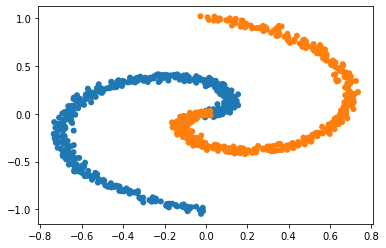

In [6]:
# show ground truth classification
print('ground truth')
show_data_binary_class(data, label)

current classification


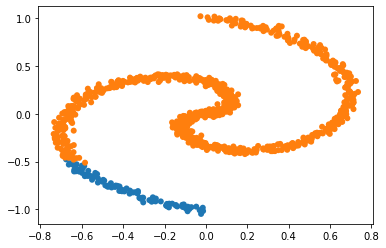

In [7]:
# test our initial (untrained) classifier
prediction = my_classifier.forward(data)
prediction_threshold = (prediction>0.5)

# show the performance of untrained classifier
print('current classification')
show_data_binary_class(data, prediction_threshold)

In [8]:
# train nonlinear classifier
n_iter = 100000
learning_rate = 0.02
loss_iter = np.zeros(n_iter, dtype=float)
accuracy_iter = np.zeros(n_iter, dtype=float)
for iter in range(n_iter):

    prediction =  my_classifier.forward(data)
    [loss, accuracy, dLdw1] =  my_classifier.backward(label)
    dW1 = -learning_rate*dLdw1

    my_classifier.update(dW1)
    loss_iter[iter] = loss

    prediction_threshold = (prediction>0.5)
    accuracy_iter[iter] = accuracy

    if iter % 5000 == 0:
        print(loss)


0.6882070314519618
0.42737319816372316
0.4144058377062427
0.4114885298101994
0.41059291428858796
0.4102787291936967
0.4101606106797236
0.4101144210677231
0.4100959290755501
0.41008841794628675
0.4100853392984899
0.41008407017279414
0.41008354507958134
0.4100833273164486
0.41008323687140574
0.4100831992699319
0.41008318362782537
0.4100831771181431
0.41008317440834685
0.4100831732801472


(0.0, 2.0)

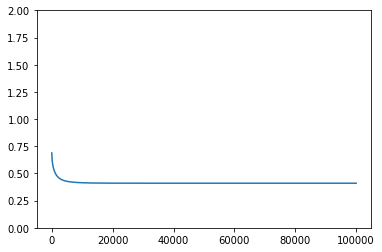

In [9]:
# show loss during training
plt.plot( range(1,n_iter+1), loss_iter)  
plt.ylim((0, 2))

(0.0, 100.0)

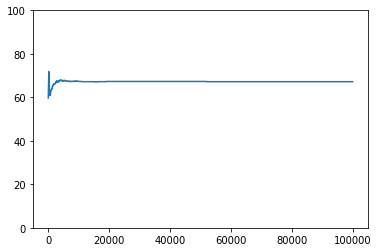

In [10]:
# show accuracy during training
plt.plot(  range(1,n_iter+1), 100*accuracy_iter)  
plt.ylim((0, 100))

current classification


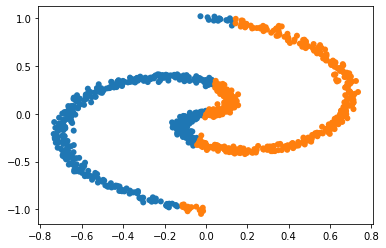

In [11]:
# test our trained classifier
prediction = my_classifier.forward(data)
prediction_threshold = (prediction>0.5)

# show result from trained classifier
print('current classification')
show_data_binary_class(data, prediction_threshold)

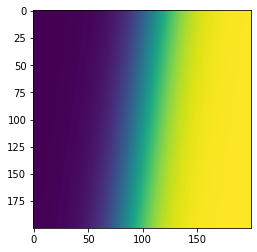

In [12]:
Xtest = np.mgrid[-1:1:0.01, -1:1:0.01].reshape(2,-1)

prediction = my_classifier.forward(Xtest)
prediction_img = np.rot90(prediction.reshape(200, 200), k=1, axes=(0, 1))
plt.imshow(prediction_img)